In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load & read data

In [2]:
df=pd.read_csv('D:\\PGP IN DATA SCIENCE with Careerera\\Data Sets\\Iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Dataset information

In [3]:
df.shape

(150, 5)

In [4]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Null Value count

In [7]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

#### Statistical measures

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


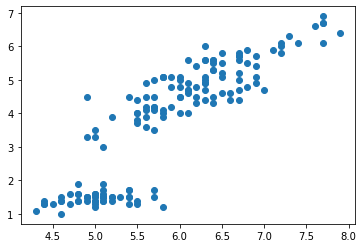

In [8]:
plt.scatter(df.sepal_length, df.petal_length);

#### Apply K-Means Clustering

In [14]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
y_predict=km.fit_predict(df[['sepal_length', 'petal_length']])
y_predict

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [15]:
#add newly created column to dataset
df['cluster_no']=y_predict
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster_no
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [16]:
#cluster_no value count
df.cluster_no.value_counts()

0    58
1    51
2    41
Name: cluster_no, dtype: int64

In [17]:
#species value count
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [19]:
# 3 center points of clusters
km.cluster_centers_

array([[5.87413793, 4.39310345],
       [5.00784314, 1.49411765],
       [6.83902439, 5.67804878]])

In [20]:
#create 3 different datasets according to cluster_no
first=df[df.cluster_no==0]
second=df[df.cluster_no==1]
third=df[df.cluster_no==2]

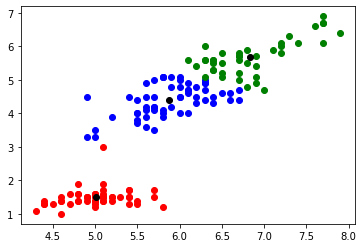

In [32]:
#plot the data classified data points with Centroids
plt.scatter(first.sepal_length, first.petal_length,color='Blue');
plt.scatter(second.sepal_length, second.petal_length,color='Red');
plt.scatter(third.sepal_length, third.petal_length,color='Green');
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='Black')

**Change K Values**

In [39]:
a=[]
for k in range(1,10):
    km=KMeans(n_clusters=k)
    km.fit_predict(df[['sepal_length', 'petal_length']])
    a.append(km.inertia_)
print("Inertia:" ,a)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows wi

Inertia: [566.0320666666668, 112.96262731481482, 53.801351193126536, 34.31442077922078, 25.63146450956451, 21.944365812565817, 18.509607859531773, 15.060478563833827, 13.335476399331663]


Text(0, 0.5, 'Inertia')

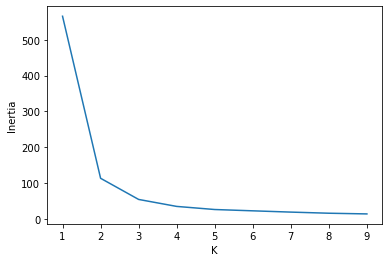

In [37]:
plt.plot(range(1,10),a)
plt.xlabel('K')
plt.ylabel('Inertia')

K=3 is good one to choose.

In [1]:
###check whether scaling the features affect the model

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
scaler=MinMaxScaler()
scaler.fit(df[['sepal_length']])
df['sepal_length']=scaler.transform(df[['sepal_length']])
scaler.fit(df[['petal_length']])
df['petal_length']=scaler.transform(df[['petal_length']])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster_no
0,0.222222,3.5,0.067797,0.2,setosa,0
1,0.166667,3.0,0.067797,0.2,setosa,0
2,0.111111,3.2,0.050847,0.2,setosa,0
3,0.083333,3.1,0.084746,0.2,setosa,0
4,0.194444,3.6,0.067797,0.2,setosa,0


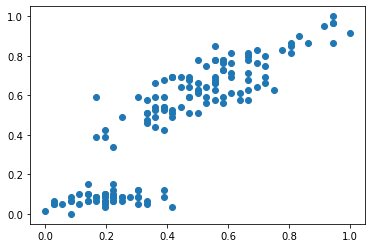

In [49]:
plt.scatter(df.sepal_length, df.petal_length);

In [50]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
y_predict=km.fit_predict(df[['sepal_length', 'petal_length']])
y_predict

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2])

In [51]:
df['cluster_no']=y_predict
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster_no
0,0.222222,3.5,0.067797,0.2,setosa,0
1,0.166667,3.0,0.067797,0.2,setosa,0
2,0.111111,3.2,0.050847,0.2,setosa,0
3,0.083333,3.1,0.084746,0.2,setosa,0
4,0.194444,3.6,0.067797,0.2,setosa,0


In [52]:
first=df[df.cluster_no==0]
second=df[df.cluster_no==1]
third=df[df.cluster_no==2]

In [54]:
km.cluster_centers_

array([[0.19601677, 0.09529901],
       [0.71476965, 0.78296817],
       [0.43948413, 0.58898305]])

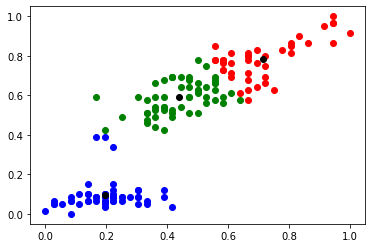

In [53]:
plt.scatter(first.sepal_length, first.petal_length,color='Blue');
plt.scatter(second.sepal_length, second.petal_length,color='Red');
plt.scatter(third.sepal_length, third.petal_length,color='Green');
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='Black')

In [55]:
a=[]
for k in range(1,10):
    km=KMeans(n_clusters=k)
    km.fit_predict(df[['sepal_length', 'petal_length']])
    a.append(km.inertia_)
print("Inertia:" ,a)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows wi

Inertia: [21.208947485940723, 5.325221460518181, 2.728605521636018, 1.7917464417852897, 1.38359059404579, 1.0930977162056885, 0.9259086874956818, 0.7763308459949017, 0.6386017637455801]


Text(0, 0.5, 'Inertia')

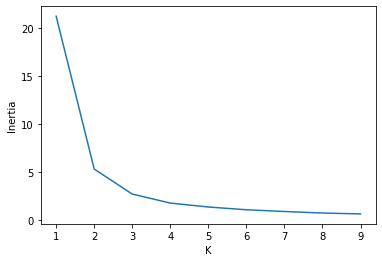

In [57]:
plt.plot(range(1,10),a)
plt.xlabel('K')
plt.ylabel('Inertia')

Here K=3, same as before i.e without scaling the features.